# Unveiling Shadows: Analyzing Crime Patterns in Los Angeles
### Name: Zarraf Afnan
### Student ID: 100880521

## <span style="color:#3498db">*Decoding LA Crime: Insights for Safer Streets*</span>

In this pivotal investigation into crime patterns in Los Angeles, I delve into the intricacies of urban safety using a meticulously sourced dataset from the Los Angeles Police Department (LAPD). Spanning various crime types, locations, and time periods from January 2023 to November 24, this dataset offers a comprehensive glimpse into the challenges faced by one of the largest and most diverse cities in the United States.
Los Angeles, renowned for its cultural richness and diverse communities, grapples with unique challenges in maintaining public safety. The dataset captures a spectrum of criminal activities, from petty thefts to more severe offenses, each leaving a distinct imprint on the city's landscape. My exploration aims to unravel patterns, trends, and potential factors influencing crime occurrences.
By dissecting the dataset based on the time of occurrence, I seek to identify specific places where crimes are more prevalent. Simultaneously, the spatial distribution of crimes across different neighborhoods will be scrutinized to pinpoint high-crime areas and explore potential correlations with various contextual factors.
This analysis goes beyond statistical findings, offering actionable insights for law enforcement agencies, policymakers, and the community. Unveiling patterns in crime occurrences can inform resource allocation, strategic law enforcement planning, and community engagement efforts. Moreover, the exploration addresses the critical issue of unresolved cases, shedding light on the rate of case closures and its implications for public safety.
As I navigate the streets of Los Angeles via data exploration, my overarching goal is to contribute to the ongoing dialogue on urban safety. Through this exploration, I strive to make meaningful contributions to the discourse on public safety in Los Angeles.

## Methods
### Data Collection

The dataset was obtained from [Data.gov](https://www.data.gov/), a comprehensive resource for finding and accessing government datasets.


In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [46]:
#Loading data
#Specifying the encoding as 'ISO-8859-1' to handle character encoding issues
crime_data=pd.read_csv(r'C:\Users\zarra\OneDrive\Desktop\project\new_file.csv',encoding='ISO-8859-1')

### Data Cleaning

To beign with, the dataset had some awkwardly named columns, which I renamed. Furthermore, some status description values were slightly modified to make the data easier to understand.

In [47]:
#Using rename function to make changes to column names
crime_data.rename(columns={
    'Vict Age': 'Victim Age','Vict Sex': 'Victim Sex','Vict Descent':'Victim Descent','Date Rptd': 'Date Reported',
    'DATE OCC': 'Date Occurred','TIME OCC': 'Time Occurred','AREA': 'Area No',
    'Crm Cd 1': 'Crime Code 1','Crm Cd 2': 'Crime Code 2','Crm Cd 3': 'Crime Code 3','Crm Cd 4': 'Crime Code 4',
    'Crm Cd Desc': 'Crime Code Desc','Weapon Used Cd': 'Weapon Code','LOCATION': 'Location'
}, inplace=True)#Using inplace=True to save modified Data Frame
crime_data['Status Desc'] = crime_data['Status Desc'].replace({'Invest Cont': 'Investigation Cont'})


The total number of NaN values in the columns 'Crime Code 2', 'Crime Code 3', 'Crime Code 4' and 'Cross Street' are 35108,
37585, 37669 and 32173 respectively. The total number of rows in the dataset is 37671. Therefore, because it seemed like 
the aforementioned 4 columns do not really provide any useful data for the project, I dropped them. Moreover, the number of
rows that had victims identified as gender 'H' was only 5. Hence, to make further data analysis simpler, I dropped those 5 rows too.

In [48]:
#Initially specifying which columns to drop
columns_to_drop = ['Crime Code 2', 'Crime Code 3', 'Crime Code 4', 'Cross Street']

#Dropping the specified columns
crime_data = crime_data.drop(columns=columns_to_drop, axis=1)
crime_data = crime_data.drop(crime_data[crime_data['Victim Sex'] == 'H'].index, axis=0)

## Analyses
Firstly, I will start by attempting to find the relationship between crime and location characteristics as well as those between gender and crime.

## Disrtibutions

### Areas and Crime Frequencies

The figure below demonstrates crime counts across the areas. It is pretty clear that there is a significant distribution 
in which the area named Central has the highest number of reported crimes while Foothill has the lowest number of 
reported crimes. 

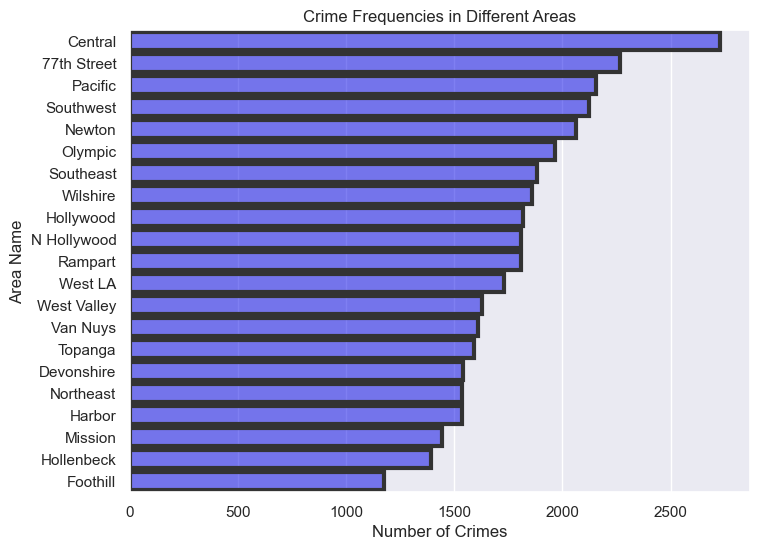

In [49]:
sns.set_theme()
crime_counts = crime_data['AREA NAME'].value_counts()

#Creating a bar plot with customization
fig, ax = plt.subplots(figsize=(8, 6))
p = sns.barplot(x=crime_counts, y=crime_counts.index, 
                capsize=.1, err_kws={'color': '0.5'}, 
                linewidth=3, edgecolor=".2", 
                facecolor=(0.0, 0.0, 0.9, 0.5), ax=ax)#Setting facecolor to blue (0.0, 0.0, 0.9) with 50% transparency

#Setting plot labels and title
ax.set_xlabel('Number of Crimes')
ax.set_ylabel('Area Name')
ax.set_title('Crime Frequencies in Different Areas')

plt.show()

### Gender and Crime Frequencies

After producing a histogram to see the spread based upon genders, nothing interesting can be found. The number of male(M) and female(F) victims look pretty close. The victims of unspecified gender(X) seem relatively low. However, a number of other external factors may have had upon those numbers.

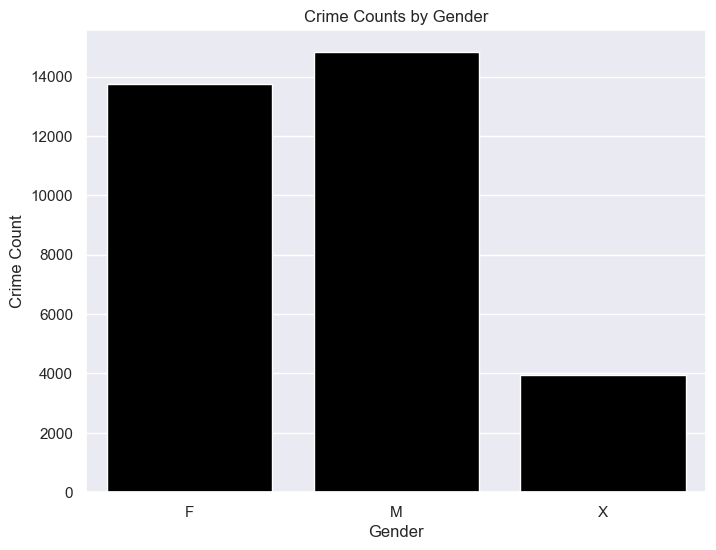

In [41]:
#Using groupby to get crime counts based upon gender
gender_counts = crime_data.groupby('Victim Sex').size()

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts, color='black')
plt.title('Crime Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Crime Count')
plt.show()

### Streets and Criminals
After examining the data regarding different types of places in which crimes take place, it seems like the most common place is street. The following figure illustrates my point. The only reason I only took rows that had over 2000 crime counts is if I took all the rows, it would have been almost impossible to understand the countplot. I would like to point out that the sreets had almost 1.5 times more cases than the single family dwellings(second higest case) and more than 2 times more reported crimes than multi-unit dwelling( third highest case).

C:\Users\zarra\AppData\Local\Temp\ipykernel_1772\2916776400.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Premis Desc', data=crime_data[crime_data['Premis Desc'].isin(premises_over_2000.index)], palette="magma")


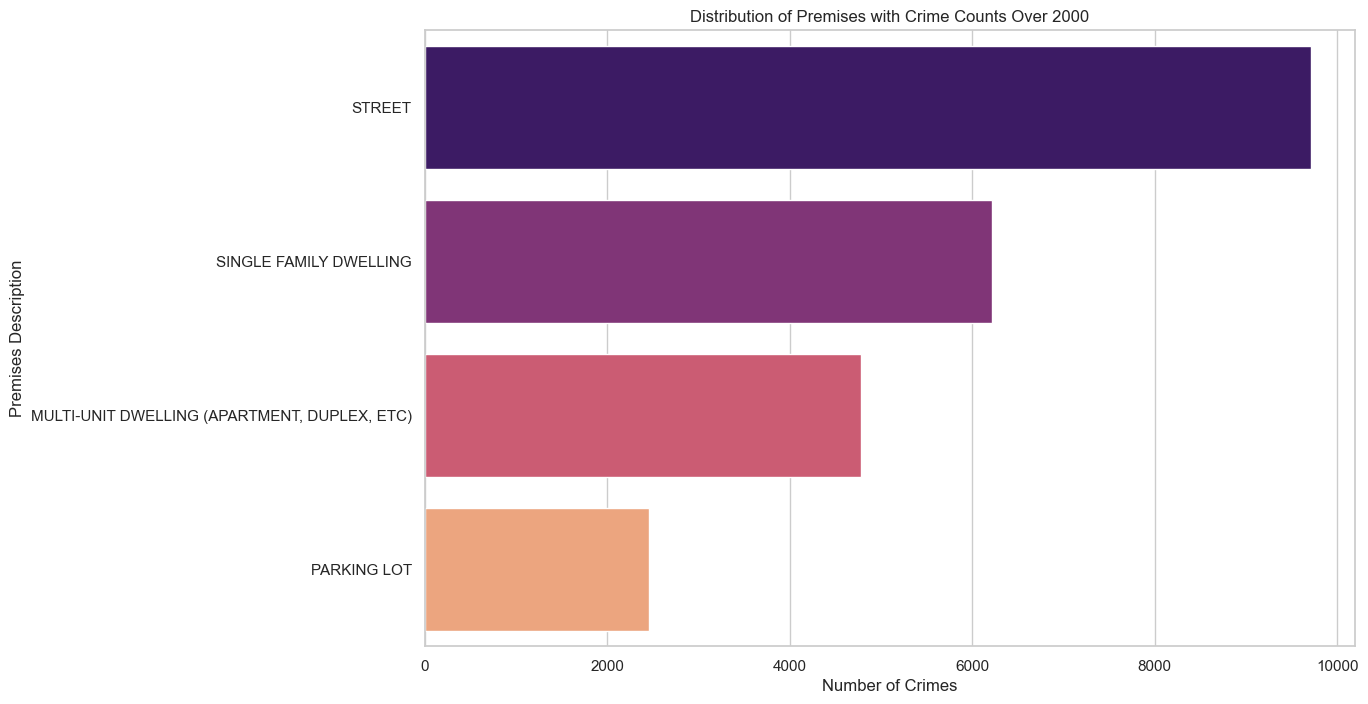

In [57]:
# Assuming 'Premis Desc' is the column containing premises information
premises_counts = crime_data['Premis Desc'].value_counts()

# Select premises with counts over 2000
premises_over_2000 = premises_counts[premises_counts > 2000]

# Set the style for the plot
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.countplot(y='Premis Desc', data=crime_data[crime_data['Premis Desc'].isin(premises_over_2000.index)], palette="magma")

plt.xlabel('Number of Crimes')
plt.ylabel('Premises Description')
plt.title('Distribution of Premises with Crime Counts Over 2000')

plt.show()

### Investigation Status Relationships
The following code provides a summary regading the status of the reported crimes.

In [58]:
status_counts = crime_data['Status Desc'].value_counts()

print(status_counts)

Status Desc
Investigation Cont    32082
Adult Other            2794
Adult Arrest           2598
Juv Arrest              118
Juv Other                74
Name: count, dtype: int64


As shown in the code above, the number of cases whose investigation is still being continued(Investigation Cont) are very high in number. This point is further made clear in the figuer below.

C:\Users\zarra\AppData\Local\Temp\ipykernel_1772\2036674260.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Status Desc', y='Count', data=status_counts, palette='deep')


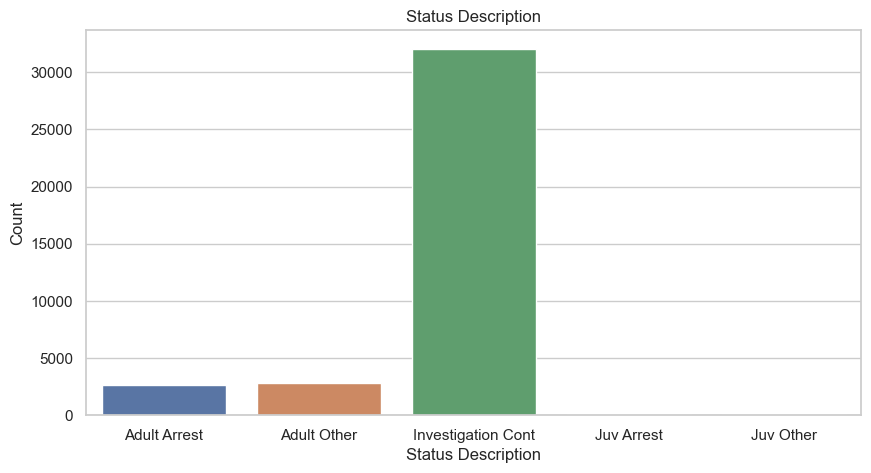

In [61]:
plt.figure(figsize=(10, 5))

#using groupby to count no of reported cases
status_counts = crime_data.groupby('Status Desc').size().reset_index(name='Count')#the 'reset_index()' function is used to convert the grouped result back to a Data Frame.

sns.barplot(x='Status Desc', y='Count', data=status_counts, palette='deep')

plt.title('Status Description')
plt.xlabel('Status Description')
plt.ylabel('Count')

plt.show()

### Streets and Stolen Vehicles
The figure below shows how, by a significant margin, most of the crimes that took place on the streets are stolen vehicles. Once agin, I did not include rows with less than 500 cases as I felt that the barplot would be almost impossible to understand if I included all the rows.

C:\Users\zarra\AppData\Local\Temp\ipykernel_1772\2340363435.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_counts, y=crime_descriptions, palette='plasma')


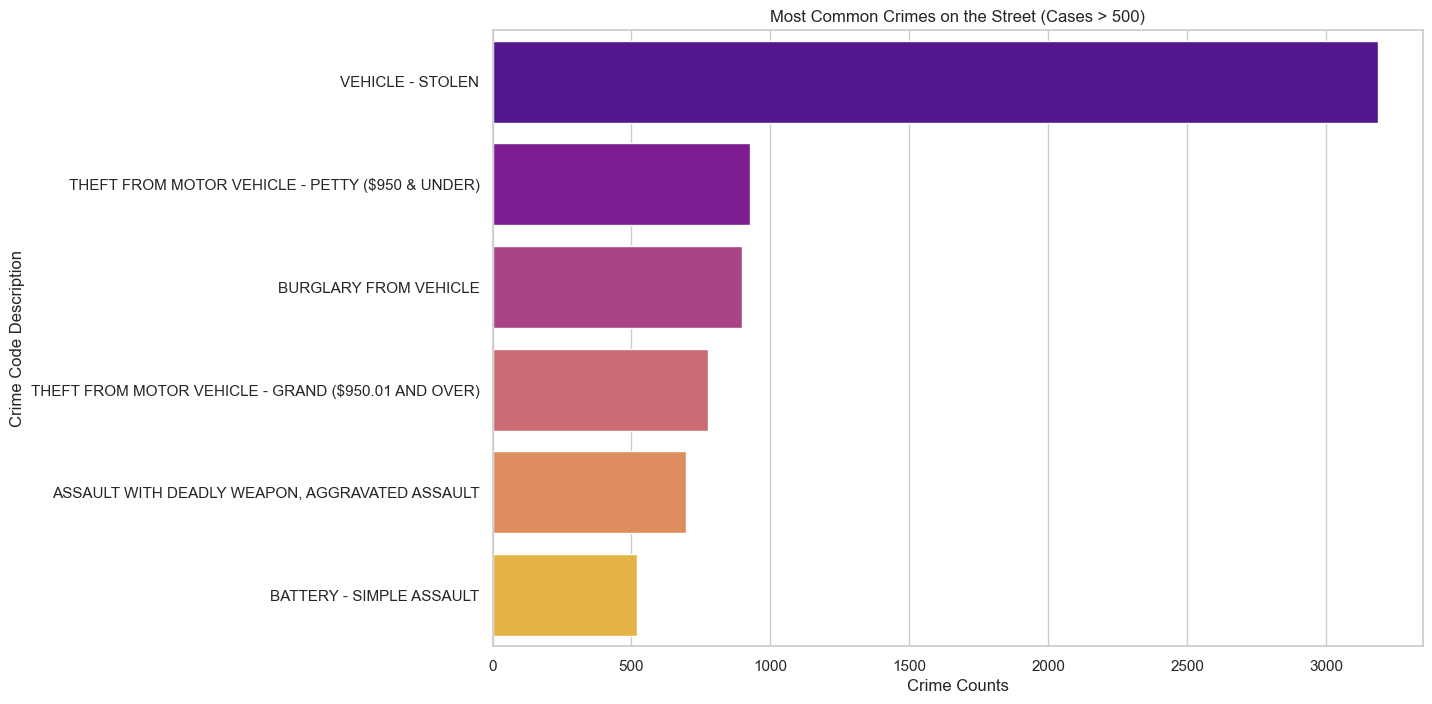

In [68]:
plt.figure(figsize=(12, 8))
sns.set_theme()

#filtering out the Data Frame as needed
street_crimes_df = crime_data[crime_data['Premis Desc'] == 'STREET']

crime_counts = street_crimes_df['Crime Code Desc'].value_counts()

#filtering out those crimes with less than 500 cases
crime_counts = crime_counts[crime_counts > 500]

#extracting out crime descriptions and  the corresponding counts
crime_descriptions = crime_counts.index
crime_counts = crime_counts.values

sns.barplot(x=crime_counts, y=crime_descriptions, palette='plasma')

plt.title('Most Common Crimes on the Street')
plt.xlabel('Crime Counts')
plt.ylabel('Crime Code Description')

plt.show()

### Victims' Ages
Initially after examining the data regarding victims' ages, it seemed like most of the victims were aged 0-10. However, after further data analysis, I realised that there is a significant number of victims with age 0. This may indicate that their ages were not specified as it seems unusual for so many victims to be less than 1 years old. Hence, I did not find anything important by analysing victims' ages. I have provided a brief summary descibing the data of victims' ages. I also provided the total number of victims aged 0 to show why I made my decision. I also could have eliminated all those rows that have victims aged 0, but doing so might remove other important data too.

In [74]:
#Brief summary of the ages of victims
print(crime_data['Victim Age'].describe())
zero_age_victims = (crime_data['Victim Age'] == 0).sum()
print("Number of victims with age 0:", zero_age_victims)

count    37666.000000
mean        28.987602
std         22.094129
min          0.000000
25%          0.000000
50%         30.000000
75%         44.000000
max         99.000000
Name: Victim Age, dtype: float64
Number of victims with age 0: 10087


## Discussion
In this comprehensive data exploration of reported crimes in Los Angeles, the findings reveal critical insights into the nature of criminal activities. A significant proportion of reported crimes occur on the streets, with a notable concentration on stolen vehicles. Furthermore, the analysis supports a concerning hypotheses that a substantial number of reported cases remain unresolved, pointing towards a potential need for enhanced investigative efforts or resources.
Despite a thorough investigation, no discernible patterns emerged linking gender and age to crime frequencies or patterns.
The implications drawn from this analysis underscore the urgency for law enforcement agencies and policymakers to consider strategic interventions. Increasing the number of officers dedicated to solving reported criminal cases could be a pivotal step towards improving case closure rates. Additionally, bolstering street-level law enforcement presence, such as deploying more police officers, might be instrumental in curbing the prevalence of street crimes.
The noteworthy concentration of stolen vehicle cases suggests the importance of public awareness campaigns to educate citizens about this specific type of crime. Heightening public awareness can empower individuals to take preventive measures, contributing to a collective effort in reducing the occurrence of such incidents.
In summary, the findings of this analysis advocate for a multi-pronged approach involving increased law enforcement personnel for case resolution, heightened street-level law enforcement presence, and targeted public awareness initiatives. These recommendations aim to collectively address the complex challenges posed by reported crimes in Los Angeles.








## Reference
1. Source Data- https://catalog.data.gov/dataset/crime-data-from-2020-to-present
2. Pandas for data manipulation
3. Numpy for data manipulation
4. Seaborn for data visualization
5. Matplotlib for data visualization
6. ChatGpt for some of my markdowns, helping myself load the dataset file(character encoding issues) as well as familiarizing myself with some of the functions
7. Seaborn, Matplotlib, Numpy and Pandas Documentation